# Train 1

In [1]:
log_data = {}
current_epoch = None
current_phase = None

# Read the file
with open('train_log.txt', 'r') as file:
    for line in file:
        line = line.strip()

        # Check for epoch line
        if line.startswith('Epoch'):
            parts = line.split()
            current_epoch = int(parts[1])
            current_phase = parts[2].strip('[]:')

            # Initialize dictionary for the epoch and phase
            if current_epoch not in log_data:
                log_data[current_epoch] = {}
            if current_phase not in log_data[current_epoch]:
                log_data[current_epoch][current_phase] = {}

        # Check for loss and accuracy lines
        elif line.startswith('train_') or line.startswith('validation_'):
            metric, value = line.split(':')
            value = float(value.strip())
            log_data[current_epoch][current_phase][metric] = value

# Print the extracted data
for epoch, data in log_data.items():
    print(f"Epoch {epoch}:")
    for phase, metrics in data.items():
        print(f"  {phase}:")
        for metric, value in metrics.items():
            print(f"    {metric}: {value}")


Epoch 0:
  Training:
    train_loss: 1.4447600841522217
    train_average_accuracy: 0.4427121633087361
    train_overall_accuracy: 0.5760649087221096
    train_accuracy_class_3: 0.46774193548387094
    train_accuracy_class_7: 0.7146974063400576
    train_accuracy_class_4: 0.7058823529411765
    train_accuracy_class_2: 0.23529411764705882
    train_accuracy_class_5: 0.4838709677419355
    train_accuracy_class_0: 0.9342105263157895
    train_accuracy_class_1: 0.0
    train_accuracy_class_6: 0.0
  Validation:
    validation_loss: 1.3077150583267212
    validation_average_accuracy: 0.46589670786638393
    validation_overall_accuracy: 0.6181747269890796
    validation_accuracy_class_7: 0.8647746243739566
    validation_accuracy_class_0: 0.608927381745503
    validation_accuracy_class_4: 0.5542763157894737
    validation_accuracy_class_5: 0.9684014869888475
    validation_accuracy_class_1: 0.0
    validation_accuracy_class_2: 0.0035211267605633804
    validation_accuracy_class_6: 0.0
    val

In [4]:
log_data[0]

{'Training': {'train_loss': 1.4447600841522217,
  'train_average_accuracy': 0.4427121633087361,
  'train_overall_accuracy': 0.5760649087221096,
  'train_accuracy_class_3': 0.46774193548387094,
  'train_accuracy_class_7': 0.7146974063400576,
  'train_accuracy_class_4': 0.7058823529411765,
  'train_accuracy_class_2': 0.23529411764705882,
  'train_accuracy_class_5': 0.4838709677419355,
  'train_accuracy_class_0': 0.9342105263157895,
  'train_accuracy_class_1': 0.0,
  'train_accuracy_class_6': 0.0},
 'Validation': {'validation_loss': 1.3077150583267212,
  'validation_average_accuracy': 0.46589670786638393,
  'validation_overall_accuracy': 0.6181747269890796,
  'validation_accuracy_class_7': 0.8647746243739566,
  'validation_accuracy_class_0': 0.608927381745503,
  'validation_accuracy_class_4': 0.5542763157894737,
  'validation_accuracy_class_5': 0.9684014869888475,
  'validation_accuracy_class_1': 0.0,
  'validation_accuracy_class_2': 0.0035211267605633804,
  'validation_accuracy_class_6':

In [7]:
import numpy as np


accuracy_0 = [log_data[epoch]['Validation']['validation_accuracy_class_0'] for epoch in log_data if 'Validation' in log_data[epoch]]
np.mean(accuracy_0)
np.std(accuracy_0)

0.12453746729163188

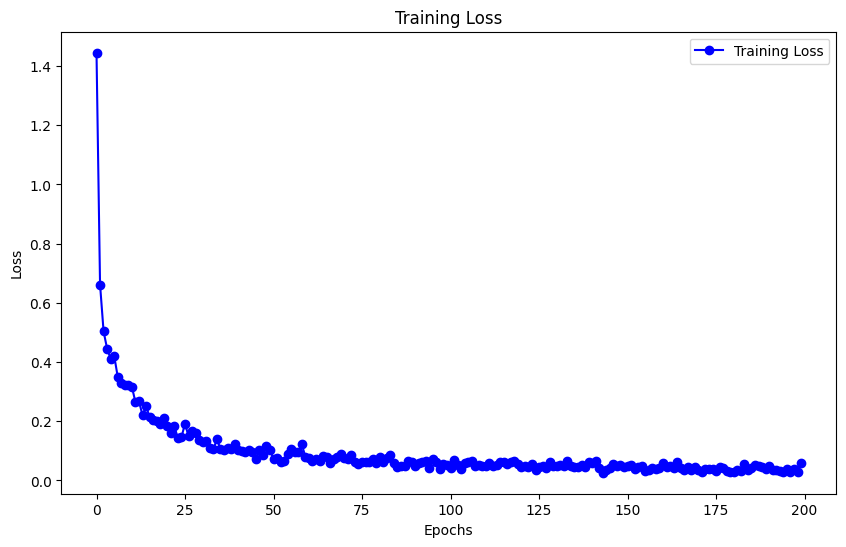

In [44]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [16]:
log_data[195]

{'Training': {'train_loss': 0.03747178986668587,
  'train_average_accuracy': 0.9861167100015626,
  'train_overall_accuracy': 0.9858012170385395,
  'train_accuracy_class_2': 0.970873786407767,
  'train_accuracy_class_7': 0.9942857142857143,
  'train_accuracy_class_3': 0.9726775956284153,
  'train_accuracy_class_4': 0.9934640522875817,
  'train_accuracy_class_0': 0.974025974025974,
  'train_accuracy_class_5': 0.9836065573770492,
  'train_accuracy_class_1': 1.0,
  'train_accuracy_class_6': 1.0},
 'Validation': {'validation_loss': 1.4416881799697876,
  'validation_average_accuracy': 0.5383600410266663,
  'validation_overall_accuracy': 0.6640015600624025,
  'validation_accuracy_class_7': 0.9975020815986678,
  'validation_accuracy_class_0': 0.7282392026578073,
  'validation_accuracy_class_4': 0.42489626556016596,
  'validation_accuracy_class_2': 0.09278350515463918,
  'validation_accuracy_class_5': 0.7342007434944238,
  'validation_accuracy_class_1': 0.4697508896797153,
  'validation_accurac

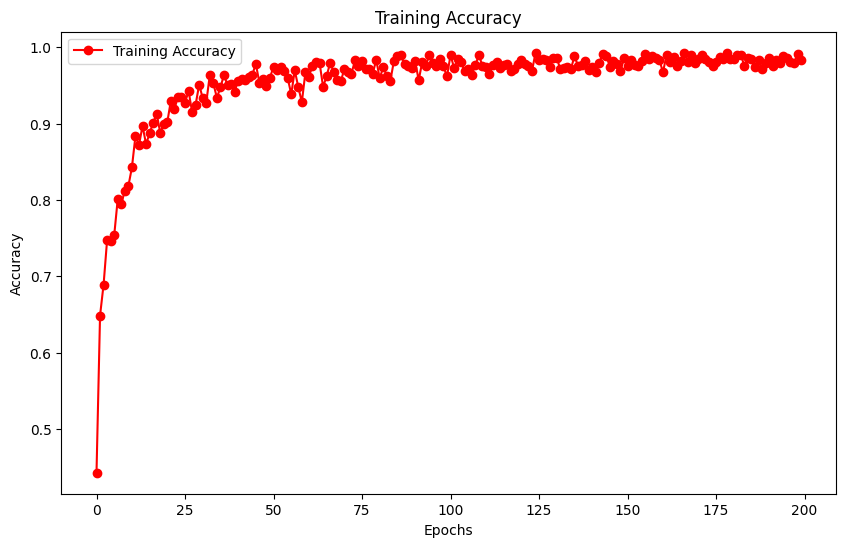

In [47]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Accuracy', color='red', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


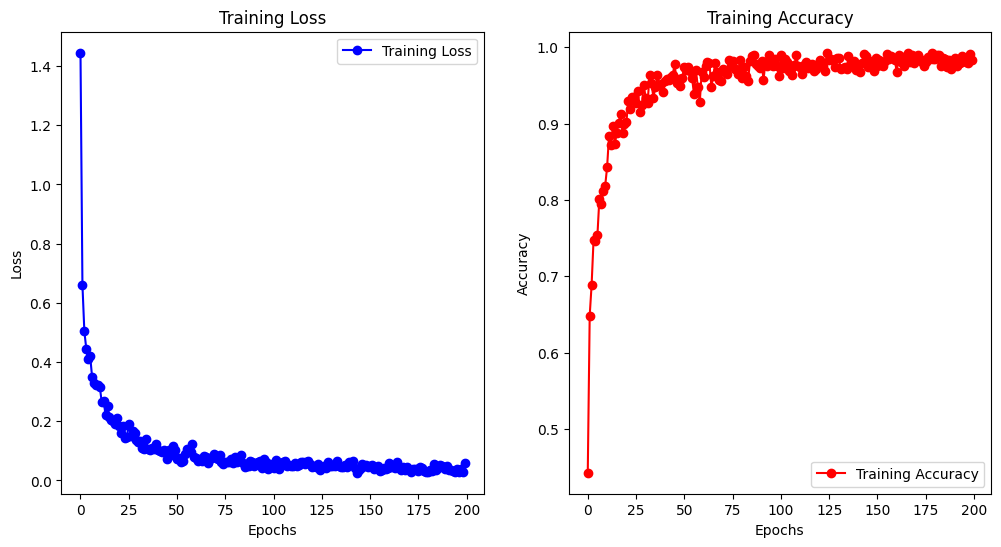

In [51]:
import matplotlib.pyplot as plt

# Assuming 'log_data' is a dictionary containing your training and validation metrics

# Extract training and validation loss and accuracy values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]
train_accuracies = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_accuracies = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Training Loss
ax1.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training Accuracy
ax2.plot(epochs, train_accuracies, label='Training Accuracy', color='red', marker='o')
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.show()


Validation

In [8]:
len(validation_losses)

40

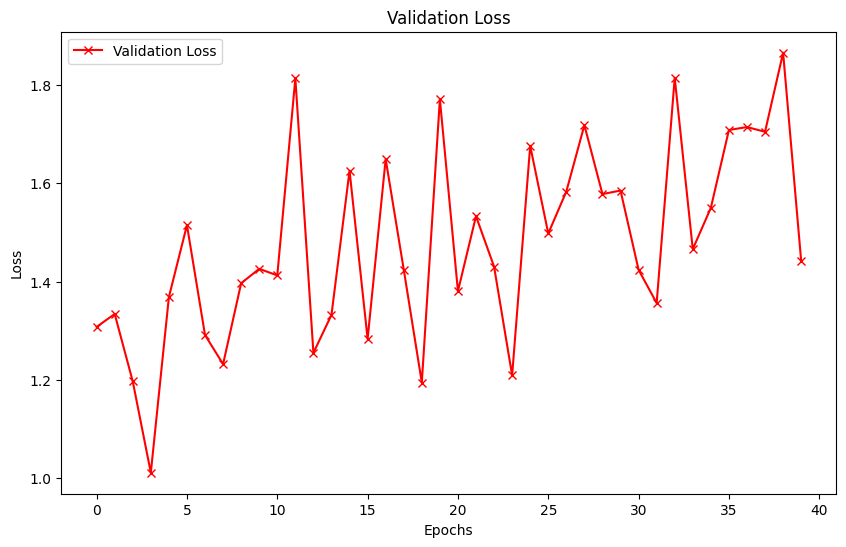

In [22]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


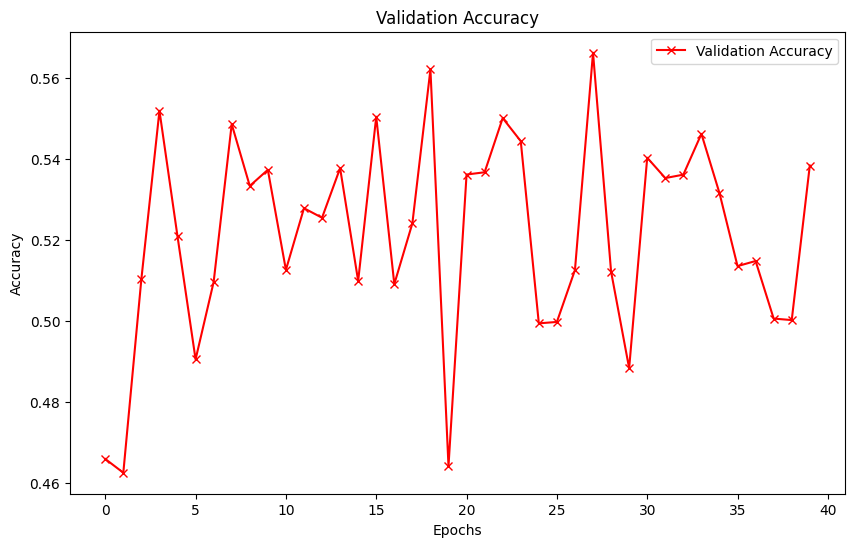

In [27]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_losses, label='Validation Accuracy', color='red', marker='x')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


Forest

In [28]:
log_data

{0: {'Training': {'train_loss': 1.4447600841522217,
   'train_average_accuracy': 0.4427121633087361,
   'train_overall_accuracy': 0.5760649087221096,
   'train_accuracy_class_3': 0.46774193548387094,
   'train_accuracy_class_7': 0.7146974063400576,
   'train_accuracy_class_4': 0.7058823529411765,
   'train_accuracy_class_2': 0.23529411764705882,
   'train_accuracy_class_5': 0.4838709677419355,
   'train_accuracy_class_0': 0.9342105263157895,
   'train_accuracy_class_1': 0.0,
   'train_accuracy_class_6': 0.0},
  'Validation': {'validation_loss': 1.3077150583267212,
   'validation_average_accuracy': 0.46589670786638393,
   'validation_overall_accuracy': 0.6181747269890796,
   'validation_accuracy_class_7': 0.8647746243739566,
   'validation_accuracy_class_0': 0.608927381745503,
   'validation_accuracy_class_4': 0.5542763157894737,
   'validation_accuracy_class_5': 0.9684014869888475,
   'validation_accuracy_class_1': 0.0,
   'validation_accuracy_class_2': 0.0035211267605633804,
   'valid

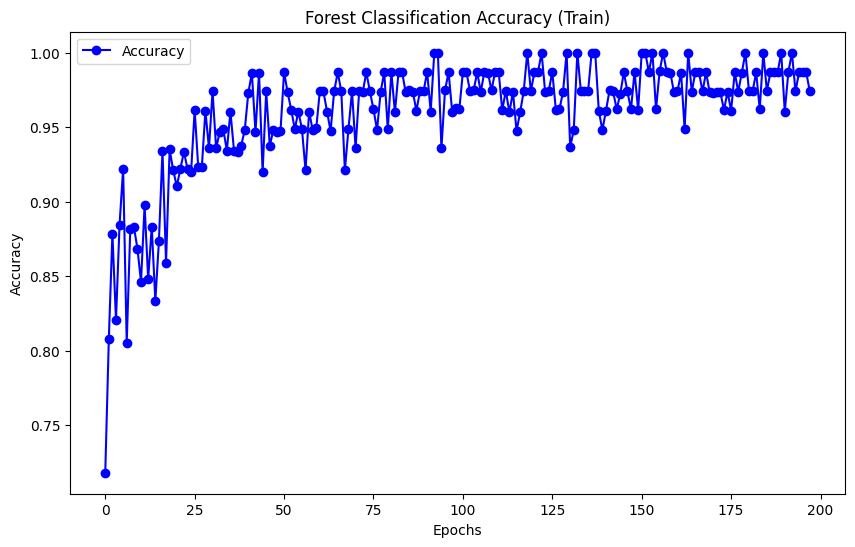

In [41]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_0'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Forest Classification Accuracy (Train)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

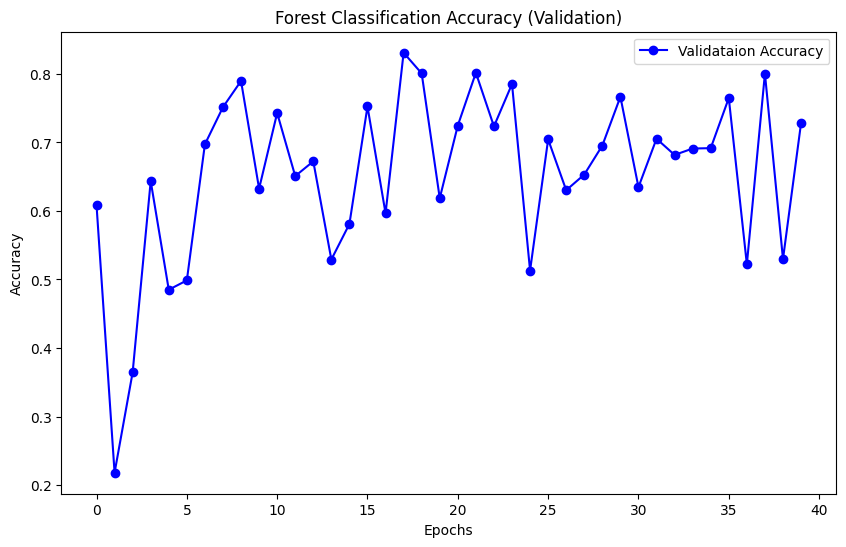

In [42]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_0'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_accuracy_class_0'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_losses, label='Validataion Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Forest Classification Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

croplands

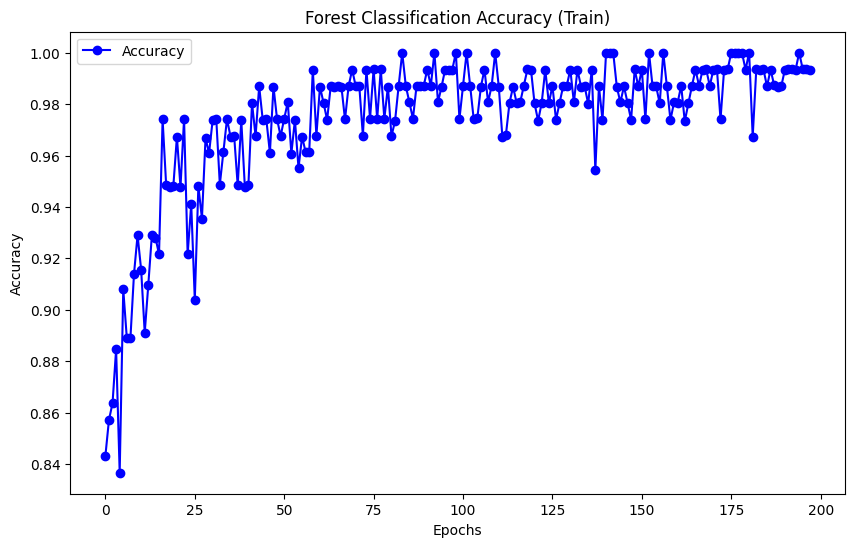

In [43]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_4'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Forest Classification Accuracy (Train)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


# Train 2 (add cacao)

In [1]:
log_data = {}
current_epoch = None
current_phase = None

# Read the file
with open('../Cacao Batch Training Log.txt', 'r') as file:
    for line in file:
        line = line.strip()

        # Check for epoch line
        if line.startswith('Epoch'):
            parts = line.split()
            current_epoch = int(parts[1])
            current_phase = parts[2].strip('[]:')

            # Initialize dictionary for the epoch and phase
            if current_epoch not in log_data:
                log_data[current_epoch] = {}
            if current_phase not in log_data[current_epoch]:
                log_data[current_epoch][current_phase] = {}

        # Check for loss and accuracy lines
        elif line.startswith('train_') or line.startswith('validation_'):
            metric, value = line.split(':')
            value = float(value.strip())
            log_data[current_epoch][current_phase][metric] = value

# Print the extracted data
for epoch, data in log_data.items():
    print(f"Epoch {epoch}:")
    for phase, metrics in data.items():
        print(f"  {phase}:")
        for metric, value in metrics.items():
            print(f"    {metric}: {value}")


Epoch 0:
  Training:
    train_loss: 1.489626169204712
    train_average_accuracy: 0.40014279382625406
    train_overall_accuracy: 0.6337033299697276
    train_accuracy_class_7: 0.8314285714285714
    train_accuracy_class_1: 0.0
    train_accuracy_class_4: 0.6842105263157895
    train_accuracy_class_6: 0.34782608695652173
    train_accuracy_class_3: 0.8360655737704918
    train_accuracy_class_2: 0.26666666666666666
    train_accuracy_class_8: 0.0
    train_accuracy_class_0: 0.3684210526315789
    train_accuracy_class_5: 0.26666666666666666
  Validation:
    validation_loss: 1.3975721597671509
    validation_average_accuracy: 0.40757654576976776
    validation_overall_accuracy: 0.5882467406110138
    validation_accuracy_class_7: 0.9807370184254607
    validation_accuracy_class_0: 0.37159920371599203
    validation_accuracy_class_4: 0.6810990840965861
    validation_accuracy_class_5: 0.7824497257769653
    validation_accuracy_class_2: 0.058419243986254296
    validation_accuracy_class_1:

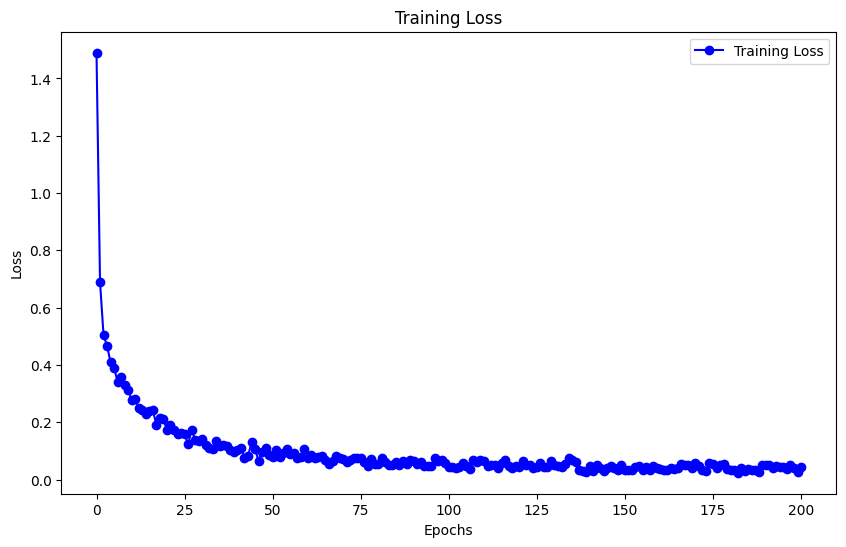

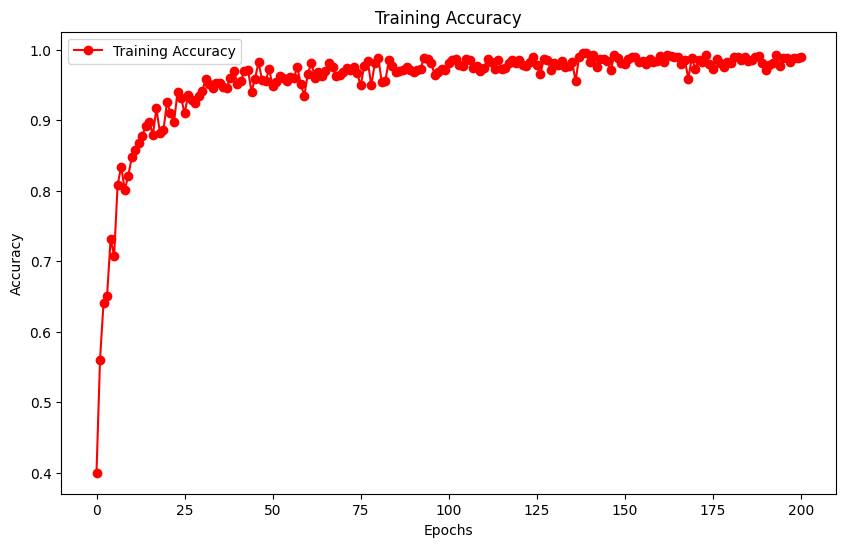

In [4]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Accuracy', color='red', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()



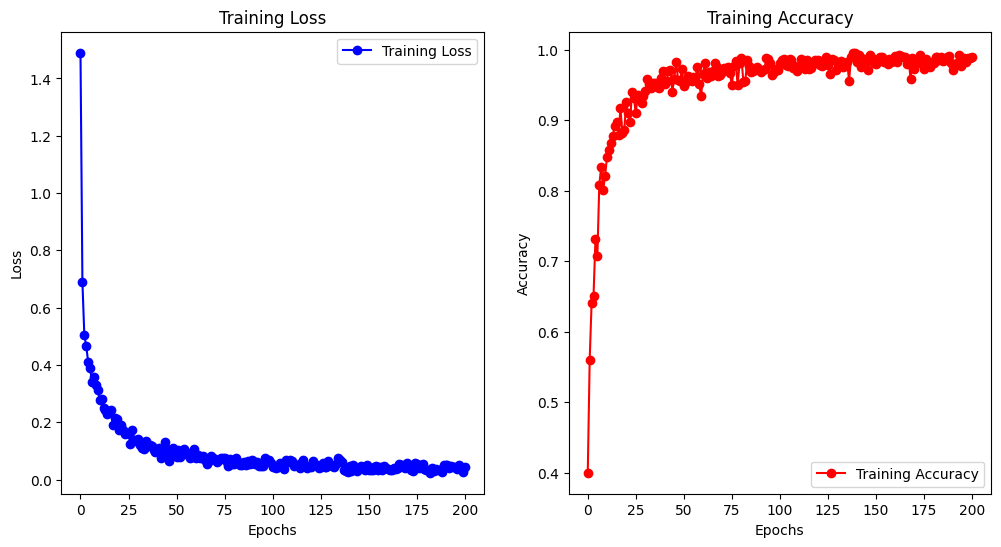

In [5]:
import matplotlib.pyplot as plt

# Assuming 'log_data' is a dictionary containing your training and validation metrics

# Extract training and validation loss and accuracy values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]
train_accuracies = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_accuracies = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Training Loss
ax1.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training Accuracy
ax2.plot(epochs, train_accuracies, label='Training Accuracy', color='red', marker='o')
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.show()

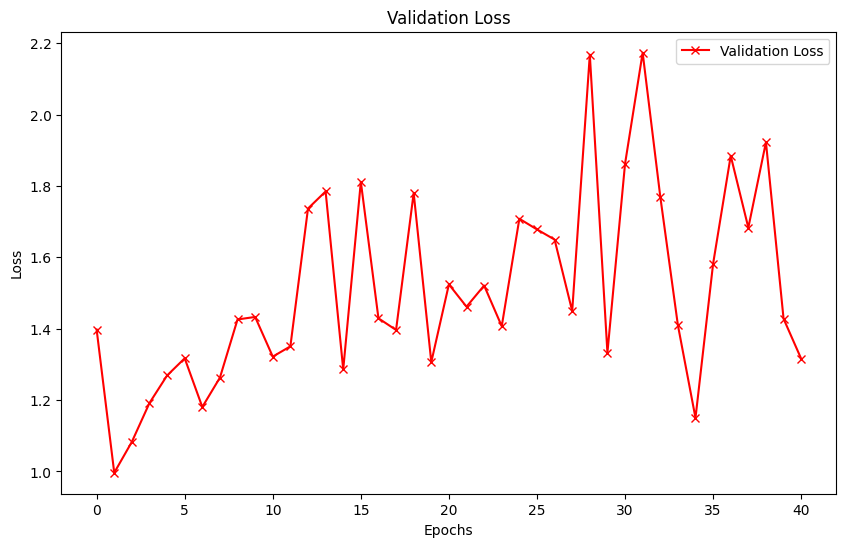

In [7]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_loss'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_loss'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


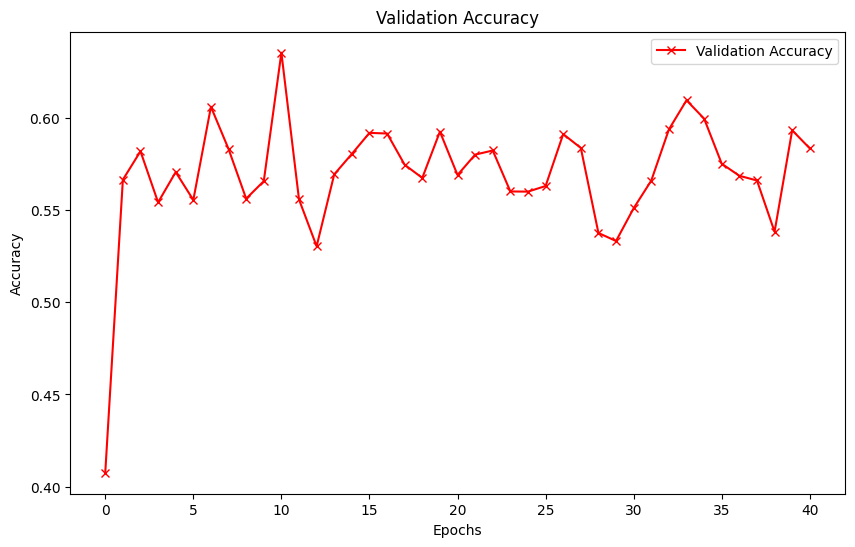

In [8]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_average_accuracy'] for epoch in log_data if 'Training' in log_data[epoch]]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_losses, label='Validation Accuracy', color='red', marker='x')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


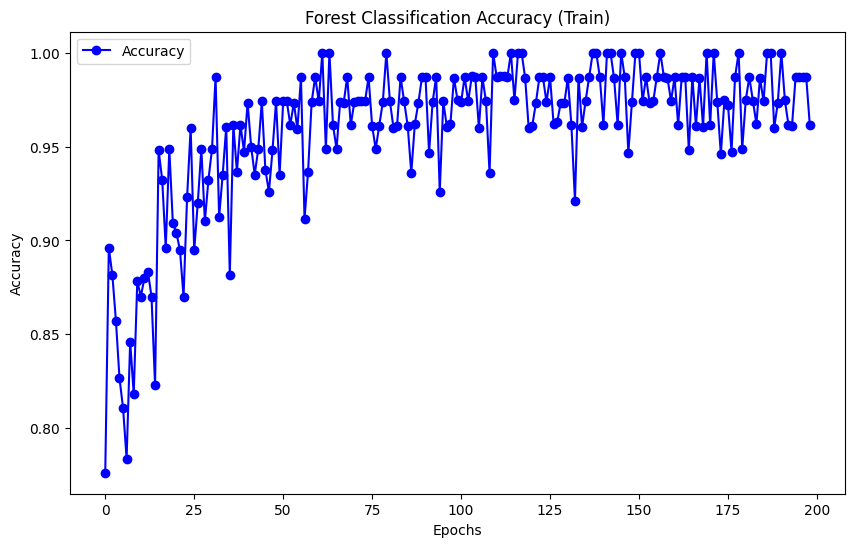

In [9]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_0'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Forest Classification Accuracy (Train)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

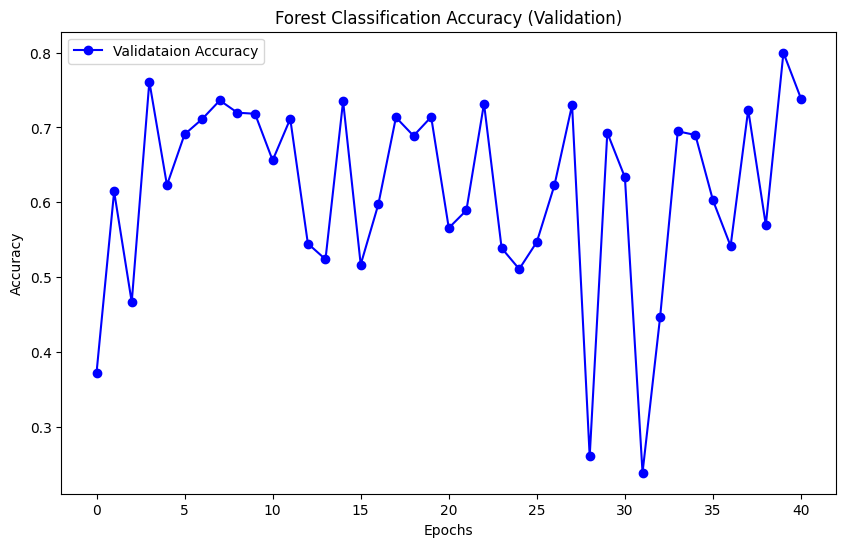

In [10]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_0'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_accuracy_class_0'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_losses, label='Validataion Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Forest Classification Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

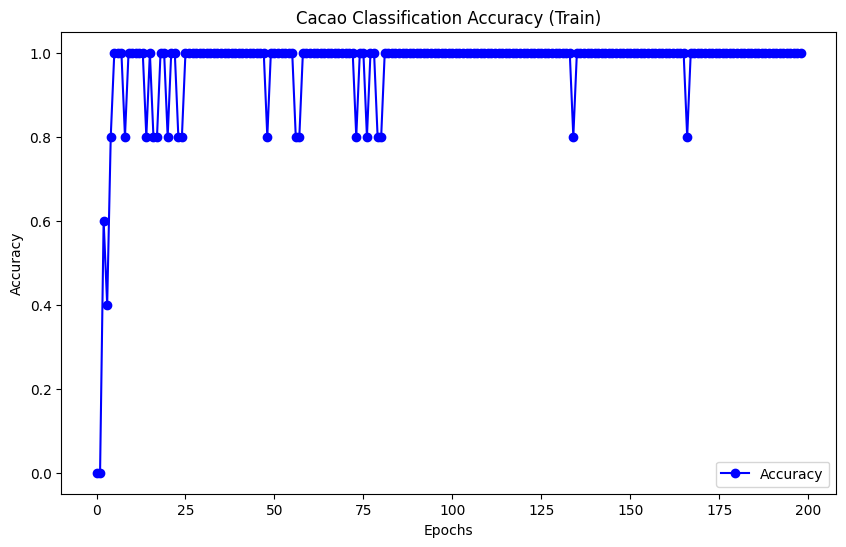

In [11]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_8'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_average_accuracy'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(train_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Cacao Classification Accuracy (Train)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

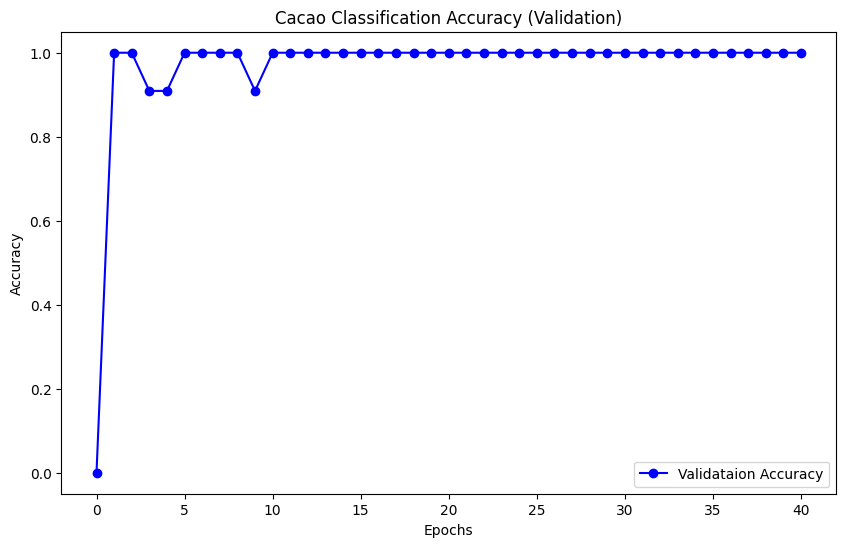

In [12]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_losses = [log_data[epoch]['Training']['train_accuracy_class_8'] for epoch in log_data if 'Training' in log_data[epoch]][2:]
validation_losses = [log_data[epoch]['Validation']['validation_accuracy_class_8'] for epoch in log_data if 'Validation' in log_data[epoch]]

# Generate the epochs list (assuming continuous epochs)
epochs = range(len(validation_losses))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_losses, label='Validataion Accuracy', color='blue', marker='o')
# plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')

# Adding title and labels
plt.title('Cacao Classification Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [16]:
log_data[200]

{'Training': {'train_loss': 0.0424807071685791,
  'train_average_accuracy': 0.9898930263237093,
  'train_overall_accuracy': 0.9889001009081736,
  'train_accuracy_class_2': 0.9901960784313726,
  'train_accuracy_class_7': 0.9914772727272727,
  'train_accuracy_class_3': 0.9890710382513661,
  'train_accuracy_class_5': 0.9833333333333333,
  'train_accuracy_class_0': 0.9615384615384616,
  'train_accuracy_class_4': 0.993421052631579,
  'train_accuracy_class_1': 1.0,
  'train_accuracy_class_6': 1.0,
  'train_accuracy_class_8': 1.0},
 'Validation': {'validation_loss': 1.3159128427505493,
  'validation_average_accuracy': 0.5833726890959509,
  'validation_overall_accuracy': 0.6653045339560226,
  'validation_accuracy_class_7': 0.9207011686143572,
  'validation_accuracy_class_0': 0.7384615384615385,
  'validation_accuracy_class_4': 0.4279835390946502,
  'validation_accuracy_class_5': 0.9382022471910112,
  'validation_accuracy_class_6': 0.3614457831325301,
  'validation_accuracy_class_1': 0.35842293

In [26]:
epoch_n = 200
split = "Validation"
remap = {}
t = log_data[epoch_n][split]
a = "train" if split == "Training" else "validation"
remap[a + '_loss'] = t[a+'_loss']
remap[a + '_average_accuracy'] = t[a + '_average_accuracy']
remap[a + 'accuracy forest'] = t[a + '_accuracy_class_0']
remap[a + 'accuracy shrubland'] = t[a + '_accuracy_class_1']
remap[a + 'accuracy grassland'] = t[a + '_accuracy_class_2']
remap[a + 'accuracy wetlands'] = t[a + '_accuracy_class_3']
remap[a + 'accuracy croplands'] = t[a + '_accuracy_class_4']
remap[a + 'accuracy urban'] = t[a + '_accuracy_class_5']
remap[a + 'accuracy barren'] = t[a + '_accuracy_class_6']
remap[a + 'accuracy water'] = t[a + '_accuracy_class_7']
remap[a + 'accuracy cacao'] = t[a + '_accuracy_class_8']
remap


{'validation_loss': 1.3159128427505493,
 'validation_average_accuracy': 0.5833726890959509,
 'validationaccuracy forest': 0.7384615384615385,
 'validationaccuracy shrubland': 0.35842293906810035,
 'validationaccuracy grassland': 0.13013698630136986,
 'validationaccuracy wetlands': 0.375,
 'validationaccuracy croplands': 0.4279835390946502,
 'validationaccuracy urban': 0.9382022471910112,
 'validationaccuracy barren': 0.3614457831325301,
 'validationaccuracy water': 0.9207011686143572,
 'validationaccuracy cacao': 1.0}

In [27]:
epoch_n = 195
split = "Validation"
remap = {}
t = log_data[epoch_n][split]
a = "train" if split == "Training" else "validation"
remap[a + '_loss'] = t[a+'_loss']
remap[a + '_average_accuracy'] = t[a + '_average_accuracy']
remap[a + 'accuracy forest'] = t[a + '_accuracy_class_0']
remap[a + 'accuracy shrubland'] = t[a + '_accuracy_class_1']
remap[a + 'accuracy grassland'] = t[a + '_accuracy_class_2']
remap[a + 'accuracy wetlands'] = t[a + '_accuracy_class_3']
remap[a + 'accuracy croplands'] = t[a + '_accuracy_class_4']
remap[a + 'accuracy urban'] = t[a + '_accuracy_class_5']
remap[a + 'accuracy barren'] = t[a + '_accuracy_class_6']
remap[a + 'accuracy water'] = t[a + '_accuracy_class_7']
remap[a + 'accuracy cacao'] = t[a + '_accuracy_class_8']
remap

{'validation_loss': 1.4280096292495728,
 'validation_average_accuracy': 0.5932180649323889,
 'validationaccuracy forest': 0.8,
 'validationaccuracy shrubland': 0.3906810035842294,
 'validationaccuracy grassland': 0.10996563573883161,
 'validationaccuracy wetlands': 0.59375,
 'validationaccuracy croplands': 0.41171617161716173,
 'validationaccuracy urban': 0.7903525046382189,
 'validationaccuracy barren': 0.2692307692307692,
 'validationaccuracy water': 0.9732664995822891,
 'validationaccuracy cacao': 1.0}

# Visualize model structure

In [37]:
type(model)

torchvision.models.resnet.ResNet

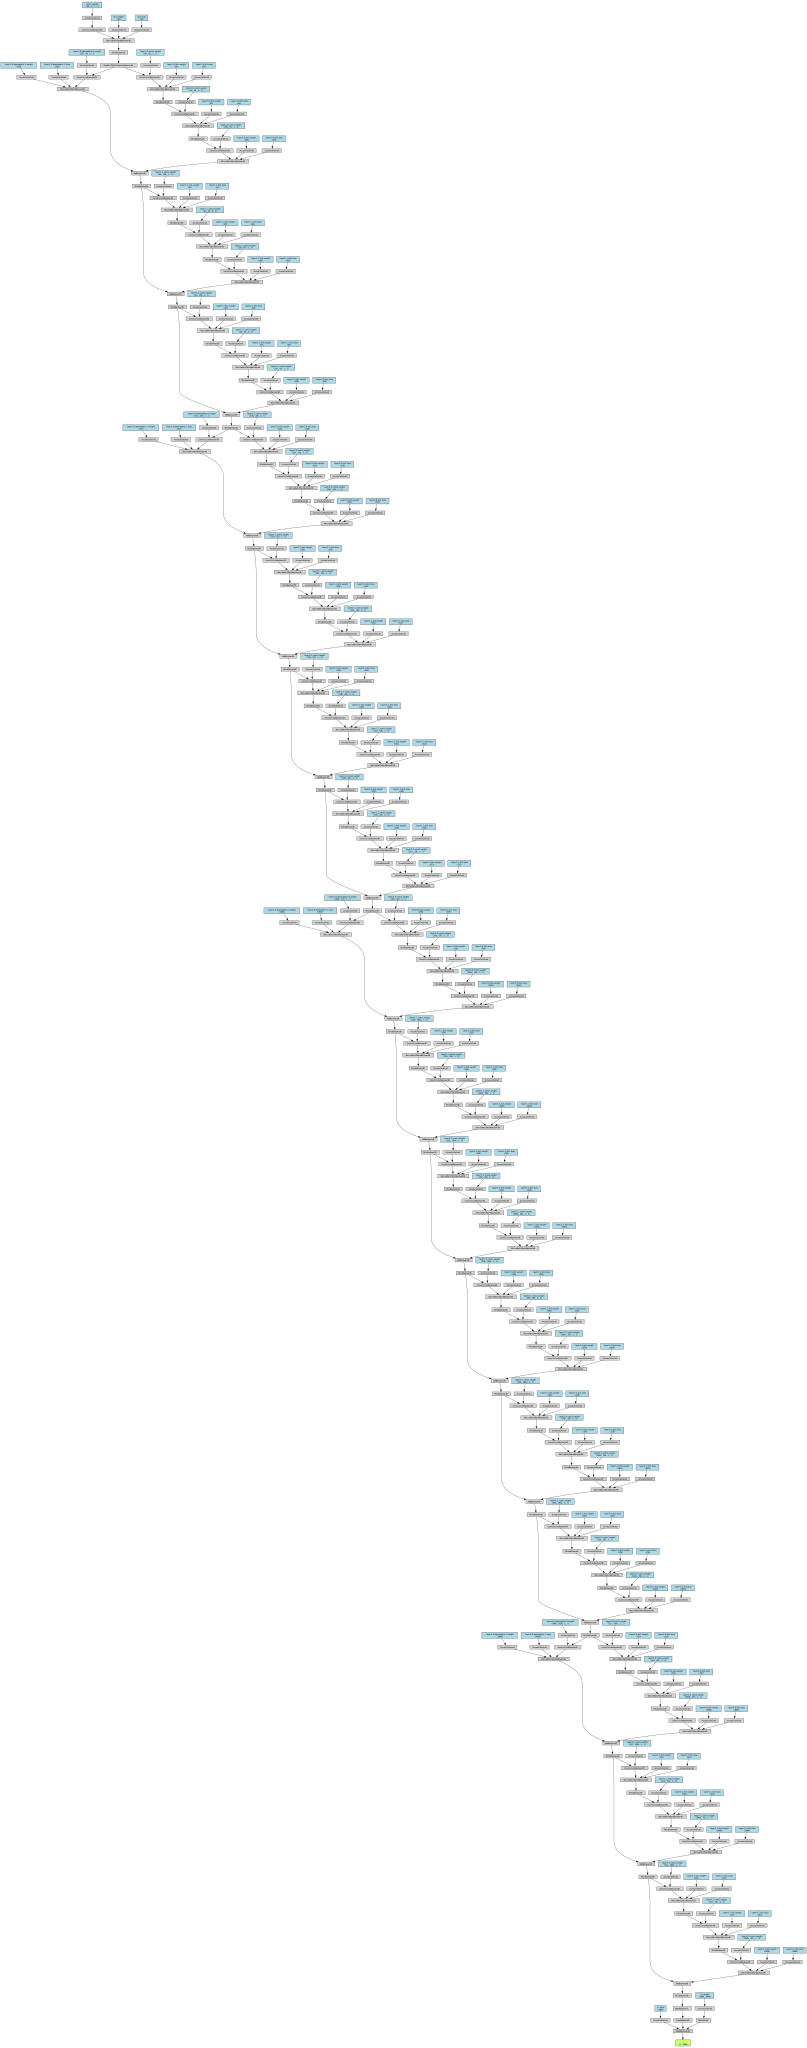

In [39]:
import torch
import torchvision.models as models
from torchviz import make_dot

# Define or load your model here. For demonstration, let's use ResNet50.
model = models.resnet50(pretrained=True)

# Input for the model visualization
# Assuming the model expects a 3-channel image (e.g., RGB), with size 224x224.
# You might need to adjust this based on your model's input requirements.
input_tensor = torch.rand(1, 3, 224, 224)

# Forward pass through the model to get the output
model_output = model(input_tensor)

# Create a visualization
dot = make_dot(model_output, params=dict(list(model.named_parameters()) + [('input', input_tensor)]))

# Save the visualization to a file
dot.render('model_visualization', format='png')

# Optionally, display the visualization in a Jupyter Notebook
dot